In [2]:
import pandas as pd
from datetime import datetime, time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from IPython.display import clear_output 
pd.options.display.max_columns = 50

CURR_PATH = os.path.dirname(os.path.abspath('__file__'))
PROJ_ROOT = os.path.join(CURR_PATH, os.pardir)
ROOT =  os.path.join(PROJ_ROOT, os.path.pardir, os.path.pardir)
DATA_IM = os.path.join(PROJ_ROOT, "data","intermediate")
sys.path.append(os.path.join(ROOT,'modules'))

import stocks as stocks
import features as feat
import plot as pl
import style as style
from backtesting import BackTesting as bt
style.set_style()
#bt.BackTesting()

Style set


In [3]:
today = datetime.today().strftime("%Y-%m-%d")
today

pd.to_datetime(today+' 09:00:00')

Timestamp('2018-03-15 09:00:00')

In [4]:
quote = 'MTG-B'
interval = '1d'
period = '3Y'
file = 'feat-'+quote + '-' + interval + '-' + period + '.pkl'
print('loading file:', file)
df = pd.read_pickle(os.path.join(DATA_IM, file))
df.tail()

loading file: feat-MTG-B-1d-3Y.pkl


close   high    low   open  stock    volume  x_volume  \
2018-03-08 17:30:00  356.0  359.6  352.2  352.6  MTG-B  158407.0  339084.0   
2018-03-09 17:30:00  356.4  358.4  354.0  356.0  MTG-B  107192.0  158407.0   
2018-03-12 17:30:00  355.2  360.2  352.6  358.0  MTG-B  123371.0  107192.0   
2018-03-13 17:30:00  356.2  359.0  354.6  358.4  MTG-B  203017.0  123371.0   
2018-03-14 09:00:00    NaN    NaN    NaN  355.8  MTG-B       NaN  203017.0   

                     x_open_rolling_3  x_open_rolling_5  x_open_rolling_10  \
2018-03-08 17:30:00        357.466667            361.20             367.78   
2018-03-09 17:30:00        355.400000            358.72             365.60   
2018-03-12 17:30:00        355.533333            357.28             364.16   
2018-03-13 17:30:00        357.466667            356.52             362.72   
2018-03-14 09:00:00        357.400000            356.16             360.84   

                     x_open_rolling_20  x_open_rolling_30  x_open_rolling_40  \
2018-03-08 17:30:00             368.96         369.913333            369.240   
2018-03-09 17:30:00             368.36         369.773333            368.990   
2018-03-12 17:30:00             368.21         369.633333            368.700   
2018-03-13 17:30:00             367.93         369.673333            368.340   
2018-03-14 09:00:00             367.55         369.526667            367.985   

                     x_open_rolling_50  x_open_rolling_60  x_open_rolling_100  \
2018-03-08 17:30:00            366.082         363.578333             347.553   
2018-03-09 17:30:00            366.222         363.716667             347.904   
2018-03-12 17:30:00            366.412         363.750000             348.328   
2018-03-13 17:30:00            366.692         363.846667             348.835   
2018-03-14 09:00:00            366.716         363.940000             349.243   

                     x_volume_rolling_10  x_volume_rolling_20  x_close_open  \
2018-03-08 17:30:00             156166.2            219066.45      0.056754   
2018-03-09 17:30:00             156372.7            193536.85      0.000000   
2018-03-12 17:30:00             158230.4            176822.55      0.448934   
2018-03-13 17:30:00             163441.8            155585.30      0.900901   
2018-03-14 09:00:00             168624.1            155313.75     -0.112296   

                     x_open_open_days_1  x_open_open_day_1  x_low_high_days_1  \
2018-03-08 17:30:00           -1.398210          -1.398210           2.636103   
2018-03-09 17:30:00            0.964265           0.964265           2.101079   
2018-03-12 17:30:00            0.561798           0.561798           1.242938   
2018-03-13 17:30:00            0.111732           0.111732           2.155417   
2018-03-14 09:00:00           -0.725446          -0.725446           1.240835   

                     x_low_high_day_1  x_open_open_days_2  x_open_open_day_2  \
2018-03-08 17:30:00          2.636103           -2.650469          -1.270017   
2018-03-09 17:30:00          2.101079           -0.447427          -1.398210   
2018-03-12 17:30:00          1.242938            1.531480           0.964265   
2018-03-13 17:30:00          2.155417            0.674157           0.561798   
2018-03-14 09:00:00          1.240835           -0.614525           0.111732   

                              ...             x_low_high_day_10  y_low_high  \
2018-03-08 17:30:00           ...                      2.717391    2.101079   
2018-03-09 17:30:00           ...                      1.613771    1.242938   
2018-03-12 17:30:00           ...                      1.403130    2.155417   
2018-03-13 17:30:00           ...                      1.774194    1.240835   
2018-03-14 09:00:00           ...                      1.288245         NaN   

                     y_open_high  y_open_close_days_0  y_open_close_days_0_up  \
2018-03-08 17:30:00     1.985252             0.964265                       1   
2018-03-09 17:30:00     0.674157   

In [5]:
xvar = [x for x in np.unique(df.columns) if x.startswith("x_")]

In [6]:
[x for x in np.unique(df.columns) if x.startswith("y_")]

['y_low_high',
 'y_open_close_days_0',
 'y_open_close_days_0_up',
 'y_open_close_days_1',
 'y_open_close_days_10',
 'y_open_close_days_10_up',
 'y_open_close_days_1_up',
 'y_open_close_days_2',
 'y_open_close_days_2_up',
 'y_open_close_days_3',
 'y_open_close_days_3_up',
 'y_open_close_days_4',
 'y_open_close_days_4_up',
 'y_open_close_days_5',
 'y_open_close_days_5_up',
 'y_open_close_days_6',
 'y_open_close_days_6_up',
 'y_open_close_days_7',
 'y_open_close_days_7_up',
 'y_open_close_days_8',
 'y_open_close_days_8_up',
 'y_open_close_days_9',
 'y_open_close_days_9_up',
 'y_open_high']

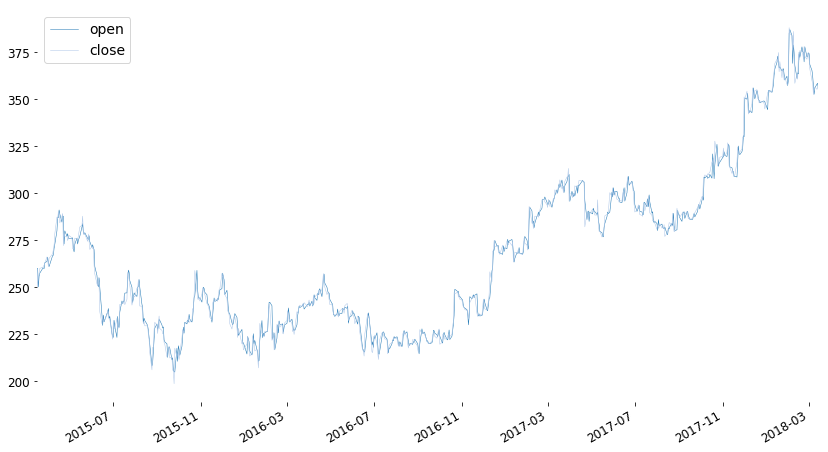

In [18]:
df[['open','close']].plot()
df = df.dropna()

In [8]:
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.linear_model import Perceptron
from sklearn.ensemble import GradientBoostingClassifier

mla = RandomForestClassifier(criterion='entropy',
                            n_estimators=10,
                            random_state=1,
                            n_jobs=2)
mla = xgboost.XGBClassifier(max_depth=6, objective='binary:logistic')

#mla = Perceptron(max_iter=40, eta0=0.1, random_state=0)

#mla = GradientBoostingClassifier(max_depth=40)

In [49]:
x = 300
for i in range(100):
    x = red(x)
print(x)

109.80970238196882


In [43]:
def red(x):
    return x - x*0.01

In [51]:
300-300*0.01**100

300.0

In [19]:
mla = xgboost.XGBClassifier(max_depth=6, objective='binary:logistic')

X_train = df[xvar].iloc[100:400, :].values
Y_train = df[yvar].iloc[100:400].values
X_test = df[xvar].iloc[400:, :].values
Y_test = df[yvar].iloc[400:]
mla.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
prediction = mla.predict(X_test)
prediction

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [21]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)

print(report)

             precision    recall  f1-score   support

         -1       0.44      0.29      0.35       103
          1       0.59      0.73      0.65       142

avg / total       0.53      0.55      0.53       245



In [39]:
d = {'pred':prediction, 'actual':Y_test, 'pct_change':df[yvar[:-3]].iloc[400:]}
df_pred = pd.DataFrame(d)

df_pred['accuracy'] = df_pred.pipe(check_accuracy)
df_pred['return'] = df_pred['pct_change']*df_pred['pred']

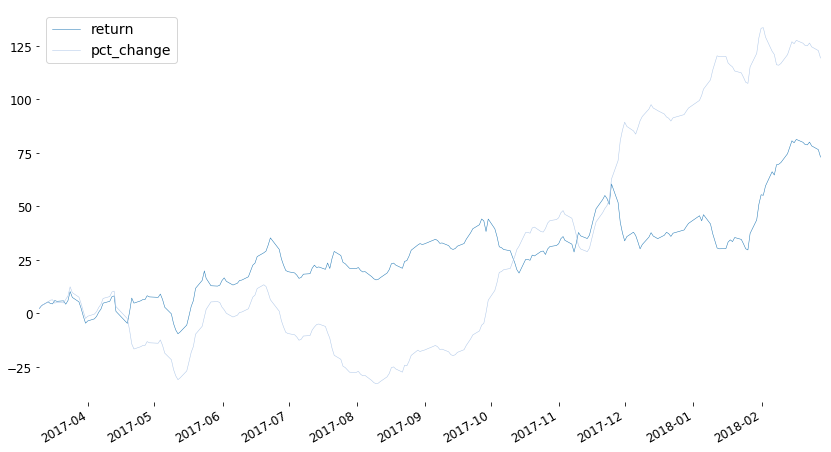

In [40]:
df_pred[['return', 'pct_change']].cumsum().plot()

In [125]:
#df[x_var].iloc[start_pred_day:pred_day,:].head(1).T
df_result.head()

Y_open_close_days_10  actual  close   open  prediction  \
datetime                                                                      
2015-08-06 17:30:00             -7.984421      -1  102.2  102.7    0.293915   
2015-08-07 17:30:00             -7.998037      -1  103.5  101.9    0.136848   
2015-08-10 17:30:00            -15.340364      -1  105.6  104.3    0.115614   
2015-08-11 17:30:00            -13.412322      -1  103.0  105.5    0.096485   
2015-08-12 17:30:00            -12.671233      -1   99.5  102.2    0.136698   

                     pred  accuracy     return  
datetime                                        
2015-08-06 17:30:00    -1       1.0   7.984421  
2015-08-07 17:30:00    -1       1.0   7.998037  
2015-08-10 17:30:00    -1       1.0  15.340364  
2015-08-11 17:30:00    -1       1.0  13.412322  
2015-08-12 17:30:00    -1       1.0  12.671233

In [29]:
def check_accuracy(df):
    accuracy = []
    for idx, row in df.iterrows():
        if (row['pred'] == row['actual']) and (row['pred']==1 or row['pred']==-1):  # Success
            accuracy = np.append(accuracy, 1)
        elif (row['pred']==0):  # No pred
            accuracy = np.append(accuracy, 0)
        elif (row['pred'] != row['actual']) and (row['pred']==1 or row['pred']==-1):  # Fail
            accuracy = np.append(accuracy, -1)
        else:
            accuracy = np.append(accuracy, np.nan)
    return accuracy

In [105]:
def set_prediction(pred):
    if pred >= 0.7:  # Long
        prediction = 1
    elif pred < 0.3:  # Short
        prediction = -1
    else:  # Stay
        prediction = 0
    return prediction

In [106]:
df_result = df_result.dropna()
df_result['pred'] = df_result['prediction'].apply(set_prediction)
df_result['actual'] = df_result['actual'].astype(int)
df_result['accuracy'] = df_result.pipe(check_accuracy)
df_result.head()

Y_open_close_days_10  actual  close   open  prediction  \
datetime                                                                      
2015-08-06 17:30:00             -7.984421      -1  102.2  102.7    0.293915   
2015-08-07 17:30:00             -7.998037      -1  103.5  101.9    0.136848   
2015-08-10 17:30:00            -15.340364      -1  105.6  104.3    0.115614   
2015-08-11 17:30:00            -13.412322      -1  103.0  105.5    0.096485   
2015-08-12 17:30:00            -12.671233      -1   99.5  102.2    0.136698   

                     pred  accuracy  
datetime                             
2015-08-06 17:30:00    -1       1.0  
2015-08-07 17:30:00    -1       1.0  
2015-08-10 17:30:00    -1       1.0  
2015-08-11 17:30:00    -1       1.0  
2015-08-12 17:30:00    -1       1.0

In [107]:
df_result['return'] = df_result[out_var].abs().mul(df_result['accuracy'])
df_result.head()

Y_open_close_days_10  actual  close   open  prediction  \
datetime                                                                      
2015-08-06 17:30:00             -7.984421      -1  102.2  102.7    0.293915   
2015-08-07 17:30:00             -7.998037      -1  103.5  101.9    0.136848   
2015-08-10 17:30:00            -15.340364      -1  105.6  104.3    0.115614   
2015-08-11 17:30:00            -13.412322      -1  103.0  105.5    0.096485   
2015-08-12 17:30:00            -12.671233      -1   99.5  102.2    0.136698   

                     pred  accuracy     return  
datetime                                        
2015-08-06 17:30:00    -1       1.0   7.984421  
2015-08-07 17:30:00    -1       1.0   7.998037  
2015-08-10 17:30:00    -1       1.0  15.340364  
2015-08-11 17:30:00    -1       1.0  13.412322  
2015-08-12 17:30:00    -1       1.0  12.671233

In [108]:
preds = df_result.groupby(['pred'])['pred'].count()
actual = df_result.groupby(['actual'])['actual'].count()

print('trades per week:',preds.loc[~0]/preds.sum()*5)
print(preds)
print(actual)

trades per week: 1.97949526814
pred
-1    251
 0    112
 1    271
Name: pred, dtype: int64
actual
-1    277
 1    357
Name: actual, dtype: int64


In [109]:
df_result = df_result.dropna()

In [110]:
df_result.groupby(['pred','actual'])['pred'].count().unstack()

actual   -1    1
pred            
-1      184   67
 0       46   66
 1       47  224

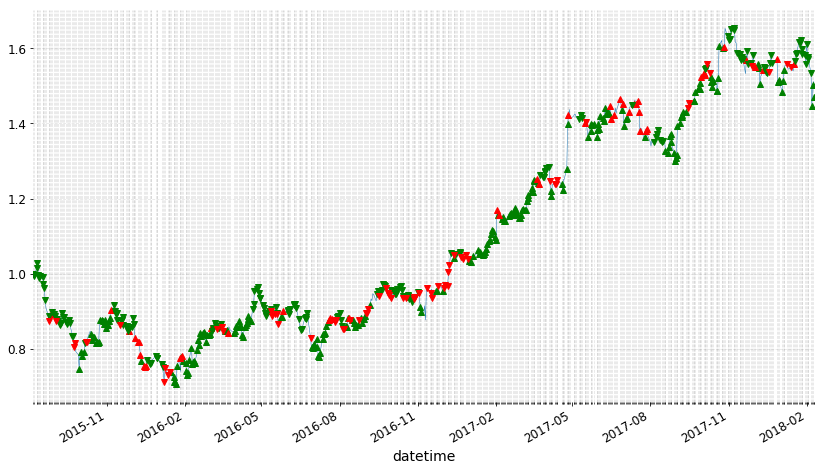

In [113]:
f, ax = plt.subplots()
start_date = pd.to_datetime('2010-03-01')
end_date = pd.to_datetime('2020-06-01')
result_slize = df_result[(df_result.index >= start_date) & (df_result.index < end_date)]
#df_result[['return', 'accuracy', 'Y_open_close_days_10']].cumsum().plot(ax=ax,legend=True)
start_val = result_slize['open'].iloc[0]
result_slize['open'].div(start_val).plot(ax=ax, secondary_y = False)
result_slize[(result_slize['pred']==1) & (result_slize['accuracy']==1)]['open'].div(start_val).plot(ax=ax, style='g^')
result_slize[(result_slize['pred']==1) & (result_slize['accuracy']==-1)]['open'].div(start_val).plot(ax=ax, style='r^')
result_slize[(result_slize['pred']==-1) & (result_slize['accuracy']==1)]['open'].div(start_val).plot(ax=ax, style='gv')
result_slize[(result_slize['pred']==-1) & (result_slize['accuracy']==-1)]['open'].div(start_val).plot(ax=ax, style='rv')
#df_result[df_result['pred']==-1]['open'].div(start_val).plot(ax=ax, style='ro')
#ax.axhline(0, ls= '--',c='r')
xtick = result_slize.index
ax.set_xticks( xtick, minor=True )
ax.grid('on', which='minor', axis='x' )
ax.grid('on', which='major', axis='y' )

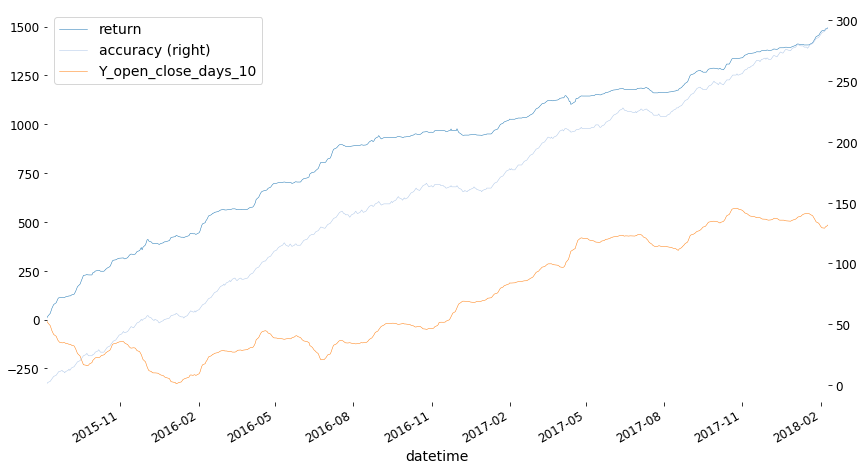

In [116]:
f, ax = plt.subplots()
df_result[['return', 'accuracy', 'Y_open_close_days_10']].cumsum().plot(ax=ax,legend=True, secondary_y = 'accuracy')

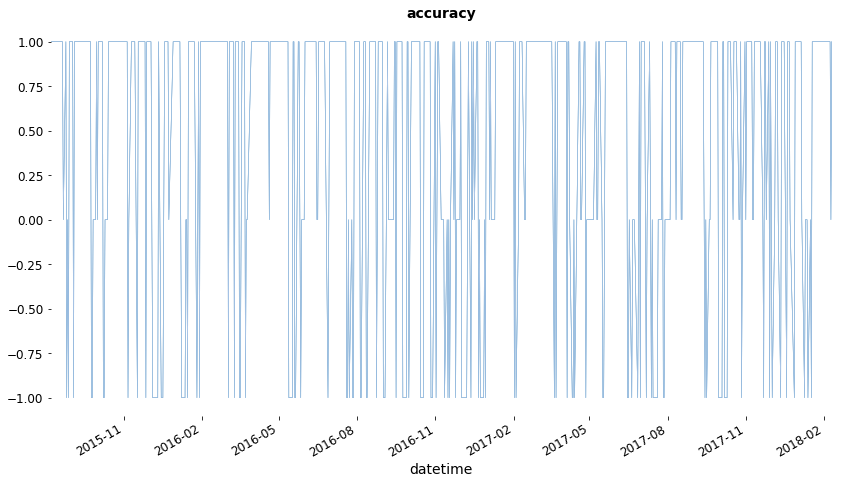

In [120]:
ax = df_result['accuracy'].plot()
df_result['accuracy'].plot(ax=ax, title='accuracy')
#df_result['pred'].plot(ax=ax)

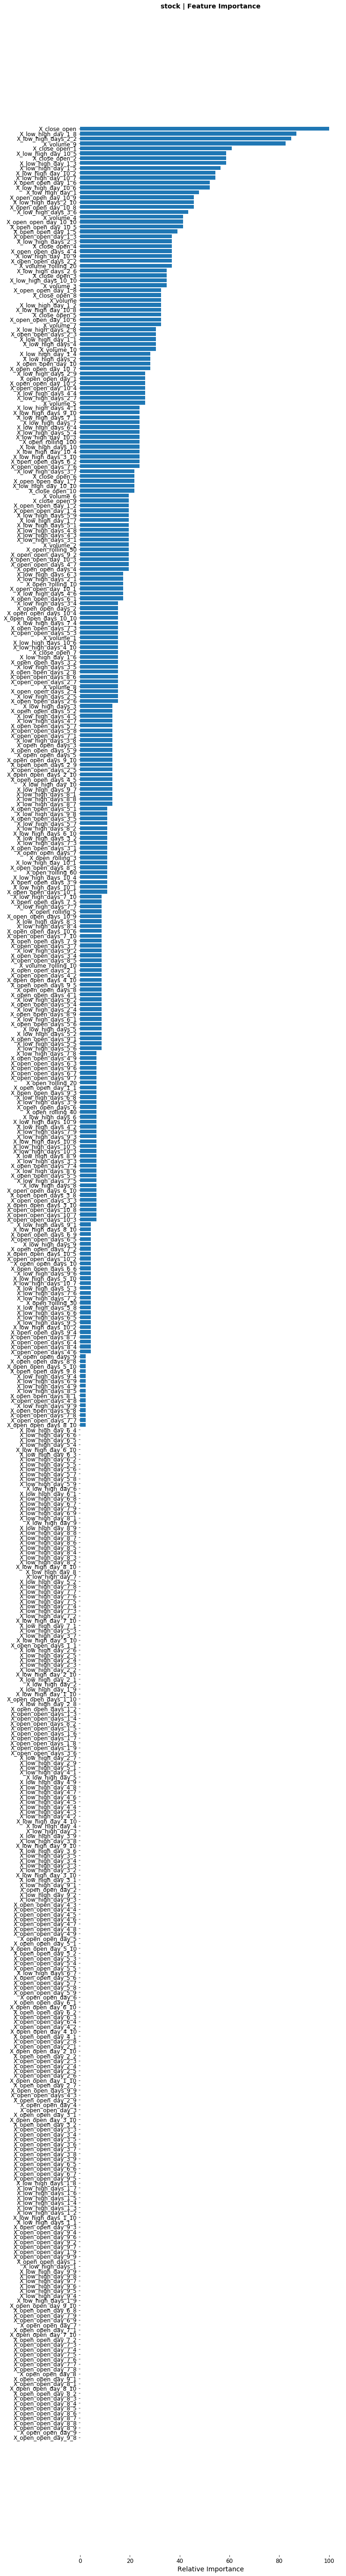

In [93]:
import plot as pl
pl.feature_importance(mla, x_var, 'stock', (10,100))

In [345]:
import 

Y_open_close_days_0           inf
actual                   1.000000
close                  179.600000
open                     0.000000
prediction               0.780766
pred                     1.000000
accuracy                 1.000000
return                        inf
Name: 2017-09-19 17:30:00, dtype: float64